In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import os
from collections import Counter
import re

%matplotlib inline

In [179]:
!pip install langdetect
from langdetect import detect

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [180]:
data_path = '../scrapers/data.json'
data_path = os.path.abspath(os.path.join(data_path))
data_path

'/home/stanislav/my_projects/JoBERTa/scrapers/data.json'

In [181]:
# df = pd.read_json(data_path).drop_duplicates(inplace=False,subset='url')
df = pd.read_json(data_path)
df['published'] = df['published'].apply(lambda x: int(re.match('\d+',x)[0]))
df = df.sort_values(by='published')
df.shape

(480, 5)

In [182]:
df.head(10)

,title,published,easy_apply,url,description
479,Software Engineer,1,False,https://www.glassdoor.com/job-listing/software...,PayPal Global Data Science implements unique f...
230,Machine Learning Software Engineer,1,False,https://www.glassdoor.com/job-listing/machine-...,"מיקום: ת""א והמרכז\n\nתיאור המשרה:\n\nאנחנו ממש..."
177,Senior Data Science,1,False,https://www.glassdoor.com/job-listing/senior-d...,"מיקום: ת""א והמרכז\n\nתיאור המשרה:\n\nלכל ה-Dat..."
361,Applied Researcher,1,False,https://www.glassdoor.com/job-listing/applied-...,About eBay\n\nWith more than 100 million activ...
244,Machine Learning Software Engineer,1,True,https://www.glassdoor.com/job-listing/machine-...,About BigPanda:\n\nBigPanda helps NOC and Oper...
415,Data Engineer,1,False,https://www.glassdoor.com/job-listing/data-eng...,Moon Active is one of the world's fastest-grow...
171,Data Engineer לחברת סטארטאפ,1,False,https://www.glassdoor.com/job-listing/data-eng...,"מיקום: ת""א והמרכז\n\nתיאור המשרה:\n\nסטארטאפ י..."
450,Machine Learning/Deep Learning algorithms,1,False,https://www.glassdoor.com/job-listing/machine-...,"We are looking for a motivated, fast learner a..."
155,Senior Data analyst לחברה מצליחה העוסקת בתחום ...,1,False,https://www.glassdoor.com/job-listing/senior-d...,"מיקום: ת""א והמרכז\n\nתיאור המשרה:\n\nאנו מחפשי..."
3,Software Engineer,1,False,https://www.glassdoor.com/job-listing/software...,Job ID: 85014\n\nRequired Travel :Minimal\n\nM...


In [183]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 479 to 197
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        473 non-null    object
 1   published    480 non-null    int64 
 2   easy_apply   480 non-null    bool  
 3   url          480 non-null    object
 4   description  480 non-null    object
dtypes: bool(1), int64(1), object(3)
memory usage: 19.2+ KB


In [184]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return None
    
df['language'] = df['description'].apply(lambda x: detect_language(x))
df = df[df['language']=='en']
df.shape

(363, 6)

In [185]:
MOST_COMMON = 15

positions = Counter(df['title'])
positions.most_common(MOST_COMMON)

[('Data Scientist', 174),
 ('Data Engineer', 25),
 ('Machine Learning Engineer', 20),
 ('Software Engineer', 18),
 ('Lead Data Scientist', 9),
 ('Cyber Data Scientist', 7),
 ('Machine Learning Software Engineer', 3),
 ('Big Data Engineer', 3),
 ('Data Engineer Team Leader', 3),
 ('Quantitative Researcher', 3),
 ('Senior Big Data Engineer', 3),
 ('Software Engineer (Future Hire)', 3),
 ('Python Developer', 2),
 ('Vulnerability Researcher', 2),
 ('Researcher', 2)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

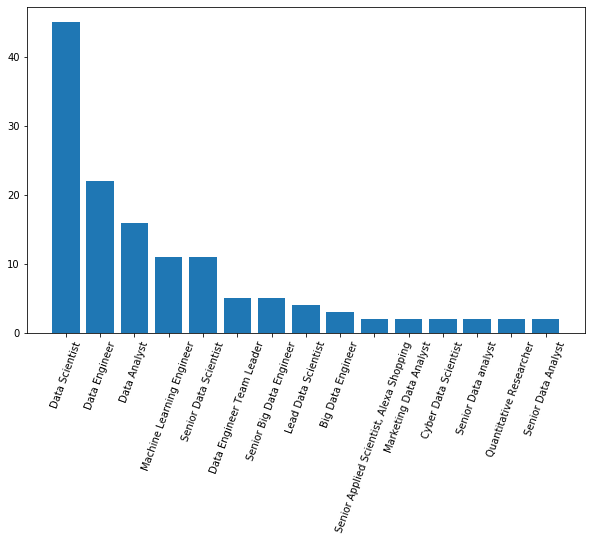

In [177]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x=[_[0] for _ in positions.most_common(MOST_COMMON)],height=[_[1] for _ in positions.most_common(MOST_COMMON)])
plt.xticks(rotation=70)